<a href="https://colab.research.google.com/github/Snigdho64/Google_Collab_Notebooks/blob/main/Bitcoin_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from google.colab import files

In [ ]:
from keras import layers,callbacks,optimizers,losses,metrics

#Downloading and Loading Our Data

In [ ]:
# files.upload()
filename = 'Bitcoin Historical Data - Investing.com India.csv'

In [ ]:
df = pd.read_csv(filename,parse_dates=['Date'],index_col=['Date'],dayfirst=True)

In [ ]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-02-09,"43,801.9","44,038.2","44,445.2","43,163.0",61.16K,-0.54%
2022-02-08,"44,038.2","43,833.9","45,399.8","42,705.0",92.88K,0.47%
2022-02-07,"43,833.9","42,385.2","44,468.3","41,695.4",76.60K,3.40%
2022-02-06,"42,392.2","41,411.9","42,614.8","41,176.3",31.20K,2.37%
2022-02-05,"41,412.1","41,566.5","41,899.8","40,963.3",46.32K,-0.37%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4225 entries, 2022-02-09 to 2010-07-18
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     4225 non-null   object
 1   Open      4225 non-null   object
 2   High      4225 non-null   object
 3   Low       4225 non-null   object
 4   Vol.      4225 non-null   object
 5   Change %  4225 non-null   object
dtypes: object(6)
memory usage: 231.1+ KB


In [ ]:
df = df.apply(lambda x:x.str.replace(',',''))
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-02-09,43801.9,44038.2,44445.2,43163.0,61.16K,-0.54%
2022-02-08,44038.2,43833.9,45399.8,42705.0,92.88K,0.47%
2022-02-07,43833.9,42385.2,44468.3,41695.4,76.60K,3.40%
2022-02-06,42392.2,41411.9,42614.8,41176.3,31.20K,2.37%
2022-02-05,41412.1,41566.5,41899.8,40963.3,46.32K,-0.37%


In [ ]:
df['Vol.'] = df['Vol.'].apply(lambda x:x[:-1])
df['Change %'] = df['Change %'].apply(lambda x:x[:-1])
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-02-09,43801.9,44038.2,44445.2,43163.0,61.16,-0.54
2022-02-08,44038.2,43833.9,45399.8,42705.0,92.88,0.47
2022-02-07,43833.9,42385.2,44468.3,41695.4,76.60,3.40
2022-02-06,42392.2,41411.9,42614.8,41176.3,31.20,2.37
2022-02-05,41412.1,41566.5,41899.8,40963.3,46.32,-0.37


In [ ]:
df = df.apply(pd.to_numeric,errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4225 entries, 2022-02-09 to 2010-07-18
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     4225 non-null   float64
 1   Open      4225 non-null   float64
 2   High      4225 non-null   float64
 3   Low       4225 non-null   float64
 4   Vol.      4219 non-null   float64
 5   Change %  4225 non-null   float64
dtypes: float64(6)
memory usage: 231.1 KB


In [ ]:
df = df.sort_index()
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08,0.0
2010-07-19,0.1,0.1,0.1,0.1,0.57,0.0
2010-07-20,0.1,0.1,0.1,0.1,0.26,0.0
2010-07-21,0.1,0.1,0.1,0.1,0.58,0.0
2010-07-22,0.1,0.1,0.1,0.1,2.16,0.0


#Plotting Our Data

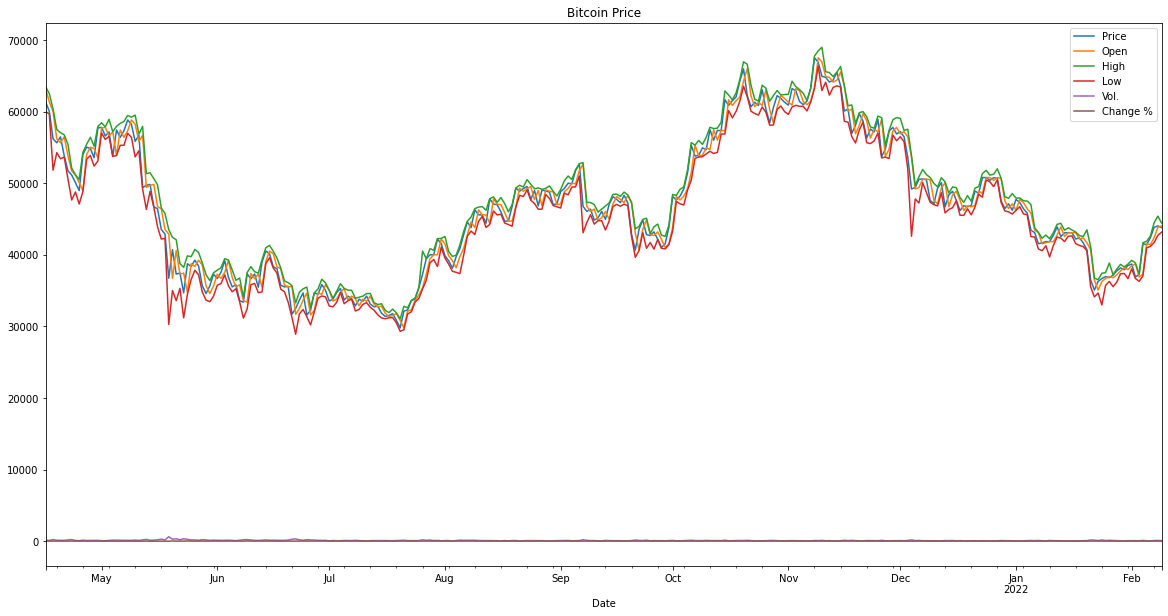

In [ ]:
df.plot(kind='line',figsize=(20,10),title='Bitcoin Price',xlim=(df.index[-300],df.index[-1]))

#Filtering our Dataframe for Data Processing

In [ ]:
x = pd.date_range('2010-7-18','2012-12-31').to_numpy()
x[:3]

array(['2010-07-18T00:00:00.000000000', '2010-07-19T00:00:00.000000000',
       '2010-07-20T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
final_df = df.drop(x).iloc[:,:1]
final_df

,Price
Date,
2013-01-01,13.3
2013-01-02,13.3
2013-01-03,13.4
2013-01-04,13.5
2013-01-05,13.4
...,...
2022-02-05,41412.1
2022-02-06,42392.2
2022-02-07,43833.9


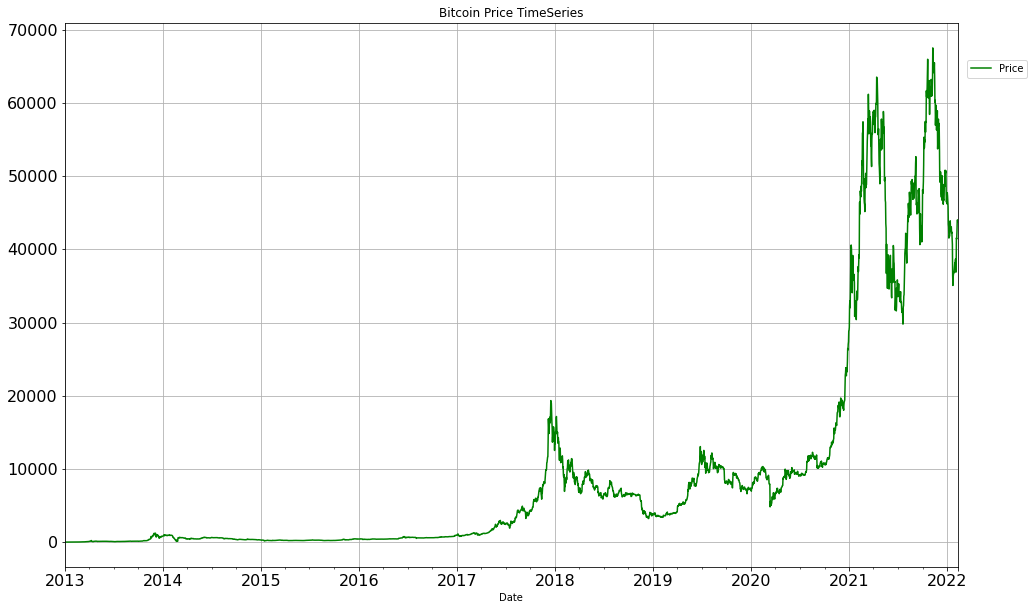

In [ ]:
final_df.plot(kind='line',figsize=(16,10),title='Bitcoin Price TimeSeries',label='BTC Price',fontsize=16,grid=True,color='green')
plt.legend(loc=(1.01,0.9));

#Model_0 (Naive Model)
Our Naive Model is **Persistence Model** ,i.e. the prediction at any timestep is equal to the previous value of the input. 

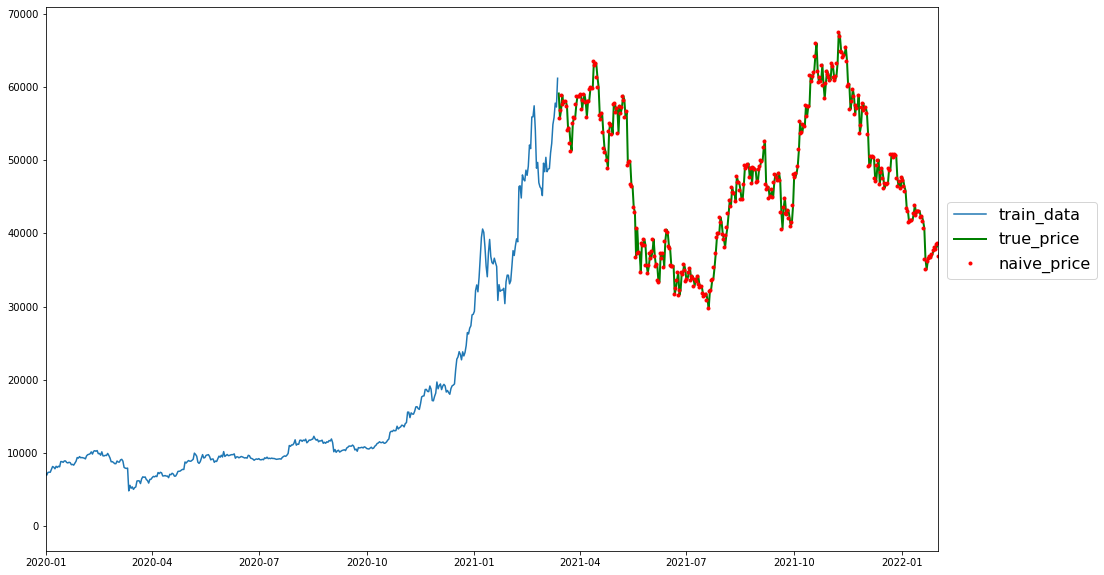

In [ ]:
split_size = len(final_df)*90//100
train_df = final_df[:split_size]
test_df = final_df[split_size:]
y_test = test_df.values[:-1]
naive_pred = test_df.values[1:]
plt.figure(figsize=(16,10))
plt.plot(train_df.index,train_df.values,label='train_data')
plt.plot(test_df.index[:-1],y_test,'-',label='true_price',color='green',lw=2)
plt.plot(test_df.index[:-1],naive_pred,'o',label='naive_price',color='red',markersize=3)
# x = pd.date_range('2016-01-01','2022-02-07')
plt.legend(loc=(1.01,0.5),prop={'size':16})
plt.xlim((np.datetime64('2020-01-01'),np.datetime64('2022-02-01')));

#Evalution Metrics For Time Series
The most common evaluation metrics are:
  1. MAE
  2. MSE
  3. MAPE
  4. MASE
  5. sMAPE


In [ ]:
#Naive_Forecast MAE
def naive_mae(y_true):
  from keras.metrics import mae
  if not tf.is_tensor(y_true):
    y_true = tf.convert_to_tensor(y_true)
  return mae(y_true[1:],y_true[:-1])
  
#Evaluation Helper Fuctions
def evaluate(y_true,y_pred):
  from keras.metrics import mae,mse,mape
  if not tf.is_tensor(y_true):
    y_true = tf.convert_to_tensor(y_true)
  if not tf.is_tensor(y_pred):
    y_pred = tf.convert_to_tensor(y_pred)
  
  y_true = tf.cast(y_true,dtype=tf.float32)
  y_pred = tf.cast(y_pred,dtype=tf.float32)

  if y_true.ndim>1:
    y_true = tf.squeeze(y_true)
    if y_true.ndim > 1:
      y_true = tf.reduce_mean(y_true,axis=1)

  if y_pred.ndim>1:
    y_pred = tf.squeeze(y_pred)
    if y_pred.ndim > 1:
      y_pred = tf.reduce_mean(y_pred,axis=1)

  mase = mae(y_true,y_pred)/naive_mae(y_true)

  return {
      'mae' : mae(y_true,y_pred).numpy(),
      'mse' : mse(y_true,y_pred).numpy(),
      'mape' : mape(y_true,y_pred).numpy(),
      'rmse' : tf.sqrt(mse(y_true,y_pred)).numpy(),
      'mase' : mase.numpy()
  }

In [ ]:
naive_results = evaluate(y_test,naive_pred)
naive_results

{'mae': 1324.1248,
 'mape': 2.837947,
 'mase': 0.99752414,
 'mse': 3234060.5,
 'rmse': 1798.3494}

#Creating Our Dataset Input Pipeline
For Time Series Data we need to create
  1.  **lookback window** data which is the previous inputs of the point forecast tahat our models takes as inputs
  2. **delay** which our model take to make future predictions
  3. **horizon** no of timesteps to predict into the future given a lookback window that our model outputs

Consecutively, **`window_length = lookback + delay +horizon`**

In [ ]:
def create_window_dataset(data,window_size,horizon,batch_size=1024,train_size=90,return_dataset=True):
  print(f'Prepareing Dataset from {data} of size {len(data)}...')
  #Create the dataset of multiple windows
  dataset = tf.data.Dataset.from_tensor_slices(data)
  dataset = dataset.window(window_size+horizon,shift=1,stride=1,drop_remainder=True)
  dataset = dataset.flat_map(lambda x:x.batch(window_size+horizon))
  dataset = dataset.map(lambda x:(x[:-horizon],x[-horizon:]))
  if not train_size:
    if return_dataset:
      return dataset
    else:
      X = np.array(list(dataset.unbatch().as_numpy_iterator()),dtype=object)
      X, y = np.stack(X[:,0]), np.stack(y[:,1])
      return X, y
  #Split the datset into train and test
  split_idx = len(data)*train_size//100
  train_dataset = dataset.take(split_idx).batch(batch_size).prefetch(tf.data.AUTOTUNE)
  test_dataset = dataset.skip(split_idx).batch(batch_size).prefetch(tf.data.AUTOTUNE)
  #Return the dataset or numpy array data
  if return_dataset:
    print(f'Successfully created Datset Input pipline of batch_size : {batch_size}')
    return train_dataset,test_dataset
  else:
    train_data =  np.array(list(train_dataset.unbatch().as_numpy_iterator()),dtype=object)
    X_train,y_train = np.stack(train_data[:,0]),np.stack(train_data[:,1])
    test_data = np.array(list(test_dataset.unbatch().as_numpy_iterator()),dtype=object)
    X_test,y_test = np.stack(test_data[:,0]),np.stack(test_data[:,1])
    print(f'Successfully created X and y data of train and test sets')
    return X_train,y_train,X_test,y_test

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1
train_ds,test_ds =create_window_dataset(final_df['Price'].to_numpy(),WINDOW_SIZE,HORIZON,train_size=90)

Prepareing Dataset from [1.33000e+01 1.33000e+01 1.34000e+01 ... 4.38339e+04 4.40382e+04
 4.38019e+04] of size 3327...
Successfully created Datset Input pipline of batch_size : 1024


In [ ]:
for X,y in test_ds.take(1):
  print(f'The Window Data:\t{X[:3]}')
  print(f'The Horizon:\t{y[:3]}')

The Window Data:	[[59113.7 55791.3 56889.7 58913.5 57656.  58088.  58093.4]
 [55791.3 56889.7 58913.5 57656.  58088.  58093.4 57383.8]
 [56889.7 58913.5 57656.  58088.  58093.4 57383.8 54158.3]]
The Horizon:	[[57383.8]
 [54158.3]
 [54452.5]]


#Compiling and Fitting Our Model

In [ ]:
#Helper Function To Compile and Fit Model
def compile_and_fit(model,train_data,valid_data,epochs=100):
  model_name = model.name
  model.compile('adam','mae',['mae','mse'])

  if len(list(train_data))==2:
    x,y = train_data[0],train_data[1] 
    model_history = model.fit(x,
                              y,
                              epochs=epochs,
                              validation_data=valid_data,
                              callbacks=[
                                          EarlyStopping(patience=50,restore_best_weights=True),
                                          TensorBoard(f'logs/{model_name}'),
                                          ReduceLROnPlateau(patience=20),
                                          ModelCheckpoint(f'checkpoint/{model_name}',save_best_only=True)
                              ],
                              verbose=0
                              )                           
  else:
    model_history = model.fit(train_data,
                              epochs=100,
                              validation_data=valid_data,
                              callbacks=[
                                          EarlyStopping(patience=epochs/10,restore_best_weights=True),
                                          TensorBoard(f'logs/{model_name}'),
                                          ReduceLROnPlateau(patience=epochs/20),
                                          ModelCheckpoint(f'checkpoint/{model_name}',save_best_only=True)
                              ],
                              verbose=0
                              )                         
  return model_history

In [ ]:
from keras import Sequential,Model

In [ ]:
from keras.layers import Dense,LSTM,GRU,Conv1D,GlobalAveragePooling1D,MaxPool1D,RNN,LeakyReLU,Lambda,Input

In [ ]:
model_1 = Sequential([Input(shape=(7)),
                      Dense(256,kernel_initializer='he_normal',activation='relu'),
                      Dense(256,kernel_initializer='he_normal',activation='relu'),
                      Dense(HORIZON)
])

In [ ]:
from keras.callbacks import EarlyStopping,TensorBoard,ModelCheckpoint,ReduceLROnPlateau

#Model_1 : Dense (lookback_window=7,horizon=1)

In [ ]:
model_1_history = compile_and_fit(model_1,train_ds,test_ds,epochs=1000)

INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: checkpoint/sequential/assets
INFO:tensorflow:Assets written to: check

In [ ]:
y_pred = np.squeeze(model_1.predict(test_ds))
y_pred.shape

(326,)

In [ ]:
y_test = []
for _,y in test_ds:

  y_test.append(y)

y_test = np.squeeze(np.array(y_test))

In [ ]:
model_1_results = evaluate(y_test,y_pred)
model_1_results

{'mae': 1836.9707,
 'mape': 3.9016838,
 'mase': 1.3859575,
 'mse': 5349221.5,
 'rmse': 2312.8384}

In [ ]:
mean = np.mean(y_pred,axis=0)
median = np.median(y_pred,axis=0)
std = np.std(y_pred,axis=0)
mean,median,std

(46557.38, 46421.47, 9205.201)

In [ ]:
#95% prediction probability
interval = 1.96*std
upper_interval = y_pred + interval
lower_interval = y_pred - interval

# Ploting our Model's Prediction with Prediction Intervals

In [ ]:
def plot_pred_interval(x,y_test,y_pred,model_name,alpha=0.05,figsize=(12,10),true_c='green',pred_f='o',pred_c='blue',pred_s=3,interval_c='orange'):
  from scipy import stats
  y_test = np.squeeze(y_test)
  y_pred = np.squeeze(y_pred)
  percent_point = stats.t.ppf(q=(1-alpha/2),df=len(y_pred))
  std = np.std(y_pred,axis=0)
  interval = percent_point*std
  lower_interval = y_pred - interval
  upper_interval = y_pred + interval
  print(lower_interval.shape,upper_interval.shape)
  #plot the Figure
  plt.figure(figsize=figsize)
  #True Value Plot
  plt.plot(x,y_test,label='True_Price',color=true_c,lw=3)
  #Pred Plot
  plt.plot(x,y_pred,pred_f,label=f'{model_name}_Pred',color=pred_c,markersize=pred_s)
  #pred Interval
  plt.fill_between(x,y1=lower_interval,y2=upper_interval,color=interval_c,label='Confidence_interval',alpha=0.75)
  plt.xlim(final_df.index[-len(y_pred)+100],final_df.index[-len(y_pred)+300]);
  plt.legend(loc=(1.01,0.9),prop={'size':16});


# Compile And Fit Model Function

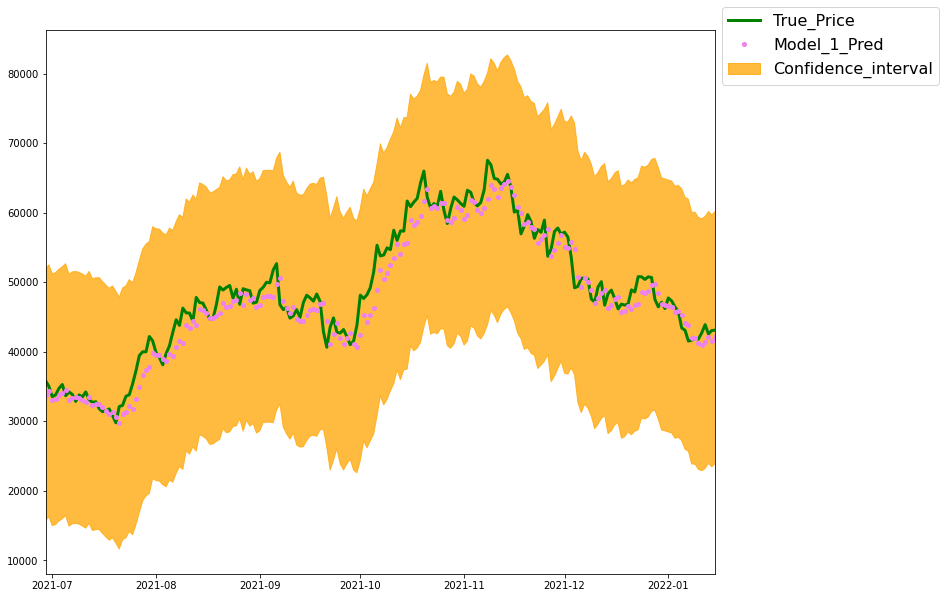

In [ ]:
plot_pred_interval(final_df.index[-len(y_pred):],y_test,y_pred,alpha=0.05,model_name='Model_1',pred_f='o',pred_c='violet',pred_s=4)

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1
X_train,y_train,X_test,y_test = create_window_dataset(df['Price'],WINDOW_SIZE,HORIZON,train_size=90,return_dataset=False)

Prepareing Dataset from Date
2010-07-18        0.1
2010-07-19        0.1
2010-07-20        0.1
2010-07-21        0.1
2010-07-22        0.1
               ...   
2022-02-05    41412.1
2022-02-06    42392.2
2022-02-07    43833.9
2022-02-08    44038.2
2022-02-09    43801.9
Name: Price, Length: 4225, dtype: float64 of size 4225...
Successfully created X and y data of train and test sets


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3802, 7), (3802, 1), (416, 7), (416, 1))

#Model_2 : (lookback_window = 7,horizon = 1)

In [ ]:
model_2 = Sequential([
                      Dense(256,activation='relu'),
                      Dense(256,activation='relu'),
                      Dense(HORIZON,)
],name='model_2_dense')

In [ ]:
model_2_history = compile_and_fit(model_2,(X_train,y_train),(X_test,y_test),epochs=1000)

INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_2_dense/assets


In [ ]:
y_pred = model_2.predict(X_test)
model_2_results = evaluate(y_test,y_pred)
model_2_results

{'mae': 1368.3337,
 'mape': 3.045096,
 'mase': 1.0029172,
 'mse': 3421728.0,
 'rmse': 1849.7914}

(416,) (416,)


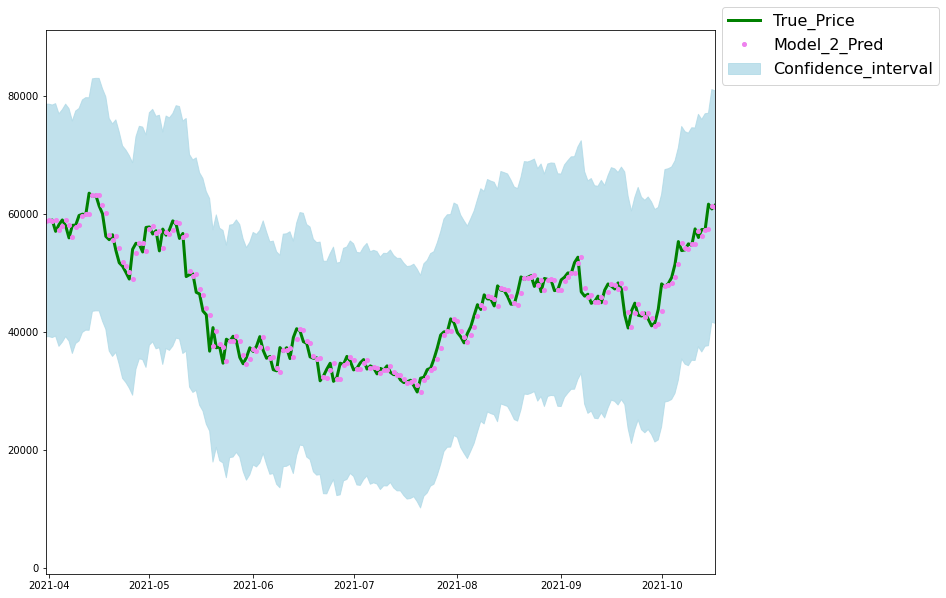

In [ ]:
plot_pred_interval(final_df.index[-len(y_pred):],y_test,y_pred,alpha=0.05,model_name='Model_2',pred_f='o',pred_c='violet',pred_s=4,interval_c='lightblue')

In [ ]:
from datetime import timedelta
def get_forecast_values(model,window_data,target_values,last_date,periods=10,epochs=1000):
  from datetime import timedelta
  start_date = last_date + timedelta(days=1)
  date_range = pd.date_range(start_date,periods=periods)
  last_window = window_data[-1].reshape(1,-1)
  forecast_values = []
  new_window = last_window
  for i in range(periods):
    #Fit the model throug the sliding window
    print(f'Fitting the model through additional {i+1} sliding window...')
    model.compile('adam','mae',['mae','mse'])
    model.fit(window_data,
              target_values,
              epochs=epochs,
              callbacks=[
                         EarlyStopping(patience=epochs/10,restore_best_weights=True,verbose=0),
                         ReduceLROnPlateau(patience=epochs/20,verbose=0)
                        ],
              verbose=0,
              )
    print(f'Making {i+1} Predictions On the Data...')
    y_pred = model.predict(new_window)
    new_window = np.append(last_window[0,:-1],y_pred).reshape(1,-1)
    window_data = np.concatenate([window_data,new_window])
    target_values = np.concatenate([target_values,y_pred]) 
    forecast_values.append(y_pred)
  return date_range, np.squeeze(forecast_values)

In [ ]:
X = np.concatenate([X_train,X_test])
y = np.concatenate([y_train,y_test])
date_range,forecast = get_forecast_values(model_2,X,y,periods=10,last_date=final_df.index[-1])

(738125.0, 738219.0)

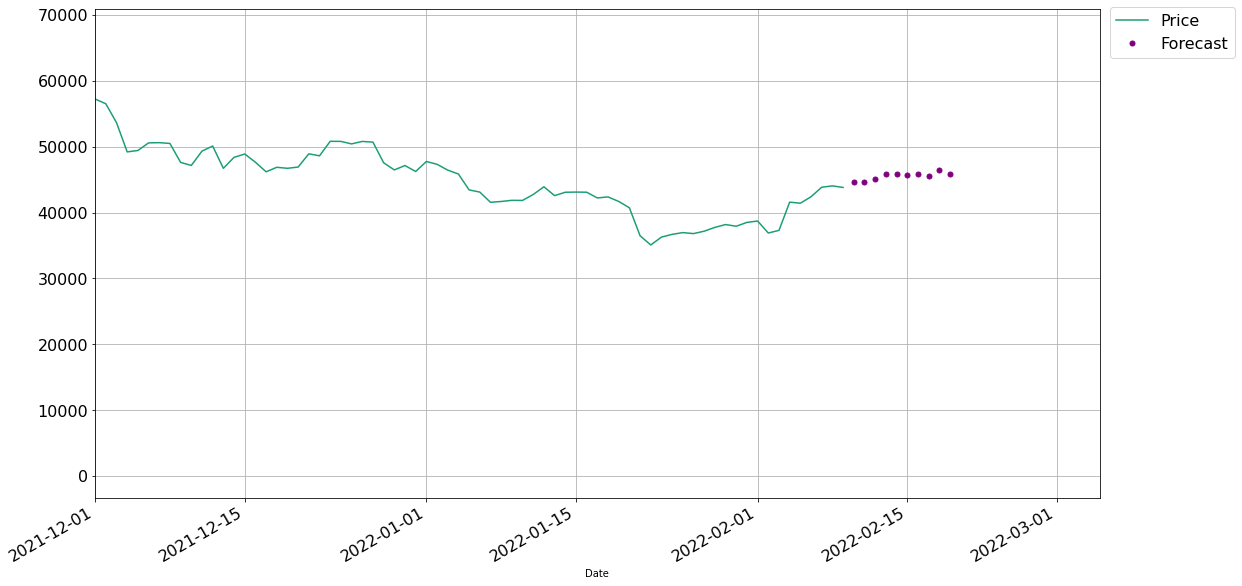

In [ ]:
final_df.plot(kind='line',figsize=(18,10),cmap='Dark2',fontsize=16,grid=True)
plt.plot(date_range,forecast,'o',markersize=5,color='purple',label='Forecast')
plt.legend(loc=(1.01,0.9),prop={'size':16})
plt.xlim((np.datetime64('2021-12-01'),np.datetime64('2022-03-05')))

#Model_3 (lookback_window= 30,horizon=1)

In [ ]:
WINDOW_SIZE = 30
HORIZON = 1
X_train,y_train,X_test,y_test = create_window_dataset(final_df['Price'],WINDOW_SIZE,HORIZON,train_size=90,return_dataset=False)

Prepareing Dataset from Date
2013-01-01       13.3
2013-01-02       13.3
2013-01-03       13.4
2013-01-04       13.5
2013-01-05       13.4
               ...   
2022-02-05    41412.1
2022-02-06    42392.2
2022-02-07    43833.9
2022-02-08    44038.2
2022-02-09    43801.9
Name: Price, Length: 3327, dtype: float64 of size 3327...
Successfully created X and y data of train and test sets


In [ ]:
model_3 = Sequential([
                      Input(shape=(WINDOW_SIZE)),
                      Dense(256,kernel_initializer='he_normal',activation='relu'),
                      Dense(128,kernel_initializer='he_normal',activation='relu'),
                      Dense(HORIZON),
],name='model_3_dense')

In [ ]:
model_3_history = compile_and_fit(model_3,(X_train,y_train),(X_test,y_test),epochs=1000)

INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets
INFO:tensorflow:Assets written to: checkpoint/model_3_dense/assets


In [ ]:
y_pred = model_3.predict(X_test)
model_3_results = evaluate(y_test,y_pred)
model_3_results

{'mae': 1396.1945,
 'mape': 3.0756936,
 'mase': 1.0503548,
 'mse': 3484248.8,
 'rmse': 1866.6143}

(303,) (303,)


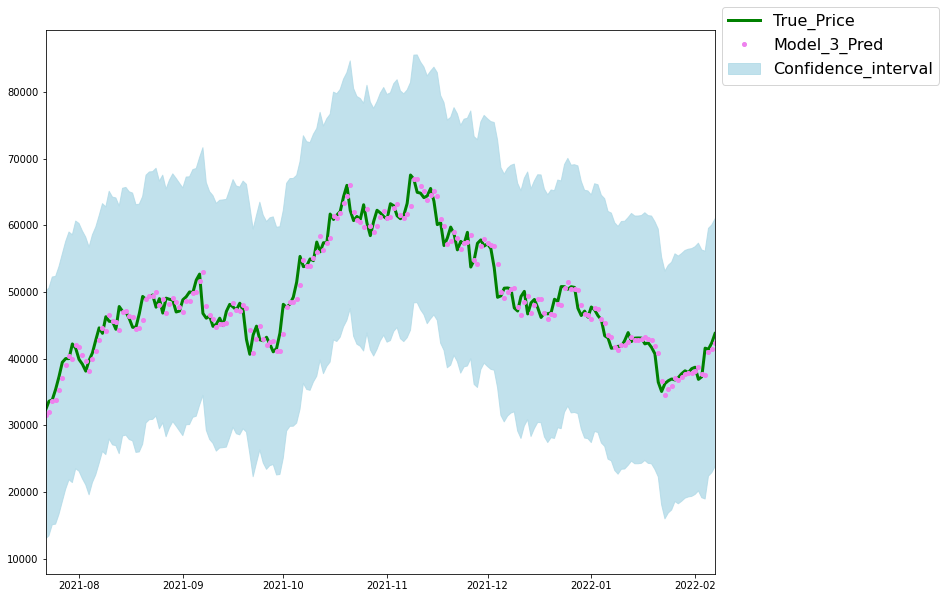

In [ ]:
plot_pred_interval(final_df.index[-len(y_pred):],y_test,y_pred,alpha=0.05,model_name='Model_3',pred_f='o',pred_c='violet',pred_s=4,interval_c='lightblue')

In [ ]:
X = np.concatenate([X_train,X_test])
y = np.concatenate([y_train,y_test])
date_range,forecast = get_forecast_values(model_3,X,y,last_date=final_df.index[-1],periods=30,epochs=100)

(738125.0, 738229.0)

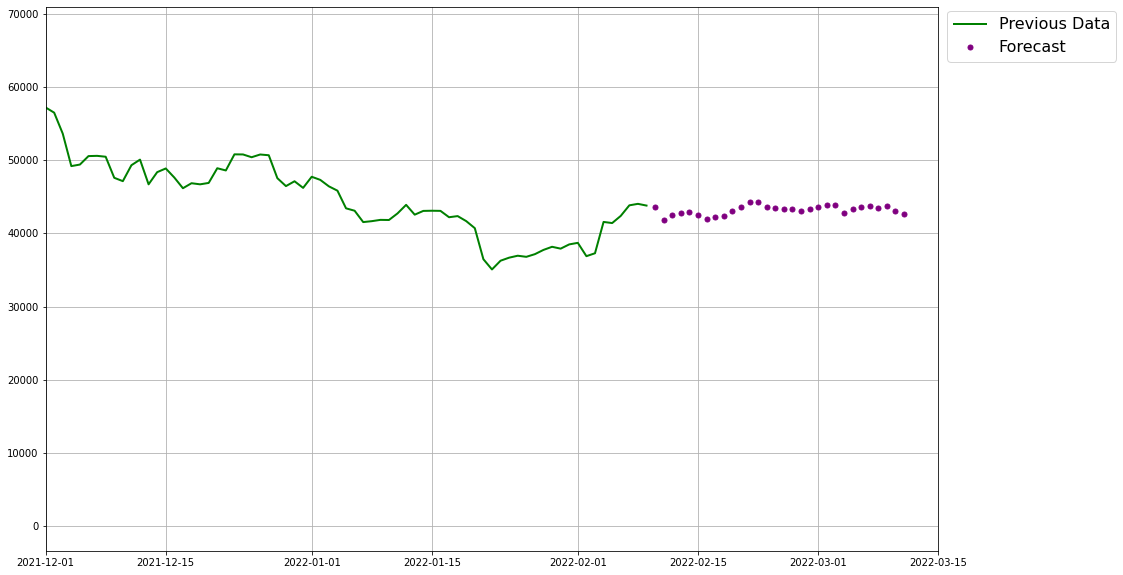

In [ ]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(final_df.index,final_df.values,'g-',lw=2,label='Previous Data')
plt.plot(date_range,forecast,'o',markersize=5,color='purple',label='Forecast')
plt.legend(loc=(1.01,0.9),prop={'size':16})
plt.xlim((np.datetime64('2021-12-01'),np.datetime64('2022-03-15')))

In [ ]:
WINDOW_SIZE = 7 
HORIZON = 1
full_dataset = create_window_dataset(df['Price'],WINDOW_SIZE,HORIZON,batch_size=1024)

Prepareing Dataset from Date
2010-07-18        0.1
2010-07-19        0.1
2010-07-20        0.1
2010-07-21        0.1
2010-07-22        0.1
               ...   
2022-02-05    41412.1
2022-02-06    42392.2
2022-02-07    43833.9
2022-02-08    44038.2
2022-02-09    43801.9
Name: Price, Length: 4225, dtype: float64 of size 4225...
Successfully created Datset Input pipline of batch_size : 1024


#Conv1D and LSTM Model

In [ ]:
inputs = Input(shape=(7))
x = Lambda(lambda x:tf.expand_dims(x,axis=0))(inputs)
x = Conv1D(filters=128,kernel_size=3,padding='causal',activation='relu')(x)
x = GlobalAveragePooling1D()